# Les concepts du *machine learning*.

Ces notes ont été prises à partir de la video du site de [Machine Learnia](https://www.youtube.com/watch?v=K9z0OD22My4&list=PLO_fdPEVlfKqUF5BPKjGSh7aV9aBshrpY&index=2) qu'il est recommandé de visionner. Il s'agit de clarifier le vocabulaire (souvent anglais) et les concepts qui sous-tendent les applications d'apprentissage automatique (*machine learning* en anglais).

## Le jeu de données (*dataset*)

Les données collectées sont organisées dans des tables ayant toujours la même structure :
- chaque ligne correspond à un enregistrement (il y en a `m`);
- chaque colonne correspond à une des caractéristiques de ces enregistrements (*feature* en anglais). 
Dans les problèmes d'apprentissage automatique, une de ces caractéristiques est identifiée comme celle qu'on veut pouvoir prédir à partir des autres. 

Dans l'apprentissage automatique supervisé, le jeu de données qui servira à l'apprentissage de notre machine, contient cette colonne de caractéristique à prédire. On l'isole du jeu de données et cela constitue la cible (*target*) de notre échantillon d'apprentissage : pour chacun des enregistrements, le modèle aura été entraîné à retrouver la composante cible correspondante. Cette cible est notée conventionnement `y`. Il s'agit donc d'un vecteur colonne ayant pour taille le nombre `m` d'enregistrements réalisés. Le reste des données auront `n` caractéristiques. Ce sera une table de `m` lignes et `n` colonne, usuellement représentée par une matrice `X`.

Les éléments de la matrice `X` seront notés $x_i^{(j)}$, $i$ étant le numéro de ligne, c'est-à dire le numéro d'enregistrement, et $j$ le numéro de colonne, c'est-à dire le numéro de la caractéristique observée (*feature*). 

Voici ci-dessous un exemple de `dataset`que j'affiche sous forme de table en utilisant l'extension [tabulate](https://github.com/astanin/python-tabulate)

In [3]:
import numpy as np
from tabulate import tabulate

titre = np.array(['Prix', 'Surface', 'code postal']).reshape(1,3)
y = np.array([313000, 720000, 250000, 290000, 190000]).reshape(5,1)
X = np.array([[90,9500],[110,93000], [40, 44500], [60,67000], [50, 59300]])

print(tabulate(np.concatenate((titre, np.concatenate((y,X), axis=1)), axis=0), tablefmt='rounded_grid'))

╭────────┬─────────┬─────────────╮
│ Prix   │ Surface │ code postal │
├────────┼─────────┼─────────────┤
│ 313000 │ 90      │ 9500        │
├────────┼─────────┼─────────────┤
│ 720000 │ 110     │ 93000       │
├────────┼─────────┼─────────────┤
│ 250000 │ 40      │ 44500       │
├────────┼─────────┼─────────────┤
│ 290000 │ 60      │ 67000       │
├────────┼─────────┼─────────────┤
│ 190000 │ 50      │ 59300       │
╰────────┴─────────┴─────────────╯


dans cet exemple, `y` est les prix observés des appartements, `X` est leurs autres caractéritiques, ici la surface et le code postal.

Le *dataset* est le couple `(X,y)`.

## Le modèle

Le modèle est une fonction qui à partir des caractéristiques observées $X$ fera une prévision qu'on espère être proche de la cible $y$. Ce modèle sera paramétré par une liste de paramètre $\theta$.

$$ y = f_\theta(x) = F(x, \theta)$$

L'objectif sera de faire apprendre notre modèle pour qu'à partir des caractéristiques observées, il obtienne un résultat proche de la cible que nous cherchons.


## La fonction coût

Pour déterminer si notre modèle donne des résultats *proches* de notre cible, on introduit une fonction coût (ou d'erreur). Cette fonction donne un calcul de l'écart des prévisions du modèle avec la cible qu'il aurait fallut atteindre. L'objectif est de déterminer les  paramètres pour lesquels, la fonction de coût est minimum.

Une fonction de coût classique est l'écart quadratique :

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \big(y - F(X, \theta)\big)^2 $$

Mais on pourra trouver d'autre forme. Par exemple, la somme des valeurs absolues aurait pu être utilisée comme fonction coût, mais n'étant pas dérivable en 0, cela perturbe les calculs à venir.


## Problème de régression ou de classification

Quand la cible peut prendre toutes les valeurs d'un domaine continu, le problème est un problème de régression. Quand elle ne peut prendre qu'un nombre fini de valeurs, alors il s'agit d'un problème de classification, que nous détaillerons par la suite.


# Exemple sur la régression linéaire

La régression a l'avantage d'être simple pour bien illustrer les concepts qui viennent d'être présentés. Le chaine de machine learnia illustre cet exemple, mais on trouve aussi d'autres présentations comme le blog de Thibault [Miximum](https://www.miximum.fr/blog/premiers-tests-avec-le-machine-learning/) présente la construction de cet algorithme du gradient. On trouve aussi plus de détails sur cet algorithme sur la page [Wikipedia](https://fr.wikipedia.org/wiki/Algorithme_du_gradient).

Le *dataset* est constitués de points de coordonnées (x,y), les ordonnées y sont nos cibles et les points x sont les m observations de notre unique caractéristique (*feature*).

Dans une régression linéaire, le modèle est une fonction de la forme: $ y = \theta_0 + \theta_1 x$


Quand nous estimons les $y$ avec cette fonction linéaire, nous faisons une erreur par rapport à notre nuage de point initial. Cette erreur peut être quantifiée au travers d'une fonction de coût qui a cette expression.


$$ J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^m \left[ \theta_0 + \theta_1 \times x^{(i)} - y^{(i)} \right]^2$$

L'objectif sera de rechercher la coût minimum en fonction des paramètres $\theta_0, \theta_1$.

Voici une représentation graphique de la fonction $J$, pour laquelle les coordonnées usuelles $(x,y)$ ont été remplacées par ces deux paramètres $(\theta_0,\theta_1)$. La valeur de $J$ peut alors être représentée par une couleur ou une hauteur sur un troisième axe fictif comme le montre la figure ci-dessous.

![fonction à deux paramètres](./img/RQKM5OWWMA.png)

Nous voyons bien que cette fonction est convexe avec un minimum unique. Le couple de paramètres que nous cherchons $\theta = (\theta_0,\theta_1)$ se trouve au minimum de cette fonction $J$. 

Cette représentation de la valeur de $J$ comme une hauteur sur un troisième axe imaginaire est souvent plus parlante. On imagine marcher sur cette surface en plein brouillard. Pour trouver le fond de cette vallée, nous nous basons sur un pas réguliers : tant que nous descendons, c'est que nous avançons vers le minimum. Si cette descente se ralentie, il est probable que nous approchons de la solution. Si tout d'un coup nous remontons, c'est que nous avons sûrement dépassé ce minimum. C'est en termes imagés le principe de l'algorithme du gradient.

On rappelle que le gradient de la fonction $J$ s'écrit de la manière suivante

$$ \overrightarrow{\nabla J} =\frac{\partial J}{\partial \theta_0} \overrightarrow{u_{\theta_0}} + \frac{\partial J}{\partial \theta_1} \vec{u_{\theta_1}}$$

Le gradient est un vecteur dont la dimension est égale au nombre de paramètre et qui designe la ligne de plus grande pente, dans le sens de la montée.

À chaque pas, il faut choisir une direction de descente et [on montre qu'une solution est de choisir l'inverse du gradient comme direction de descente](https://fr.wikipedia.org/wiki/Direction_de_descente). Si on reprend l'image de notre surface, le gradient est la projection sur la carte de la direction « où cela monte ». Les gradients sont d'ailleurs des vecteurs perpendiculaires aux lignes de niveau. En prenant la direction inverse, on est donc à peu près sûr de descendre, comme le montre l'image ci-dessous.

![chemin](./img/Gradient_descent.png)

En pratique, on multiplie cette direction par un coefficient $\alpha$, qui représente la vitesse à laquelle on veut descendre. Ce coefficient est aussi à optimiser. Un pas important permet de descendre plus vite, mais peut aussi nous faire manquer le minimum exacte.

En clair, on fera les pas suivants.

$$
\theta_0 \rightarrow \theta_0 - \alpha \times \frac{\partial J}{\partial \theta_0}
\quad ; \quad
\theta_1 \rightarrow \theta_1 - \alpha \times \frac{\partial J}{\partial \theta_1}
$$

(La méthode du gradient n'est pas la seule méthode pour trouver la meilleure pente. D'autres méthodes jugées plus efficaces existent comme la [méthode BFGS](https://en.wikipedia.org/wiki/Limited-memory_BFGS).)

Le minimum sera atteint que and le gradient sera devenu nul

$$\frac{\partial{J}}{\partial{\theta_0}} = \frac{1}{m} \sum_{i=1}^m \large(\theta_0+ \theta_1 x^{(i)} - y^{(i)}\large)$$

$$\frac{\partial{J}}{\partial{\theta_1}} = \frac{1}{m} \sum_{i=1}^m x^{(i)} \large(\theta_0+ \theta_1 x^{(i)} - y^{(i)})$$



Pour bénéficier des capacités de calcul matriciel des outils de calcul (comme le langage Python), on écrit les équations précédantes sous une forme matricielle :

$$ F = X \times \theta $$

$F$ est un vecteur colonne de $m$ éléments qui représente l'estimation du vecteur cible $Y$. 

$\theta$ est le vecteur colonne de nos deux paramètres (a,b). X est une matrice contenant nos m observations en première colonne et des 1 en seconde colonne, de telle sorte que la multiplication matricielle de l'un par l'autre donne les $m$ équations qu'on veut obtenir : c'est une matrice de taille (m,2) multiplié par $\theta$ de taille (2,1).

$$
\left[ \begin{array}{c}f^{(1)}\\f^{(2)}\\\dots\\f^{(m)}\\\end{array}\right]
=
\left[ \begin{array}{cc}1 & x^{(1)}\\1 & x^{(2)}\\\dots & \dots \\1 & x^{(m)}\\\end{array}\right]
\times
\left[\begin{array}{c}\theta_0 \\ \theta_1 \end{array}\right]
$$

Et s'il y avait eu plus de caractéristiques (n), X aurait eu n+1 colonnes : on ajoute toujours une colonne de biais à nos données pour représenter ce reste. Voici l'exemple avec deux caractéristiques.

$$
\left[ \begin{array}{c}f^{(1)}\\f^{(2)}\\\dots\\f^{(m)}\\\end{array}\right]
=
\left[ \begin{array}{ccc}1 & x_1^{(1)} & x_2^{(1)}\\ 1 & x_1^{(2)} & x_2^{(2)}\\\dots & \dots & \dots\\ 1 & x_1^{(m)} & x_2^{(m)}\\\end{array}\right]
\times
\left[\begin{array}{c}\theta_0 \\ \theta_1 \\ \theta_2 \end{array}\right]
$$


En revenant au cas simple d'une seule caractéristiques, nous pouvons aussi transformer l'expression de la fonction de coût pour lui donner une forme matricielle.

$$\begin{align*}
J(\theta_0,\theta_1) &= \frac{1}{2m}\sum_{i=1}^m (\theta_0 + \theta_1 x^{(i)} - y^{(i)})^2 \\
J(\theta) &= \frac{1}{2m} \sum(X\times\theta -Y)^2
\end{align*}$$

Et on pourra vérifier que la forme matricielle resterait inchangée en augmentant le nombre de caractéristiques.

De même, l'expression du gradient est aussi simple sous sa forme matricielle.

$$ \frac{\partial{J}(\theta)}{\partial{\theta}} = \frac{1}{m} X^T \times (X\times\theta -  Y)$$


En effet, si on décompose, nous avons vu le produit matriciel (noté ici '$\times$')

$$
X \times \theta - Y
=
\left[ \begin{array}{cc}1 & x^{(1)}\\ 1 & x^{(2)}\\\dots & \dots \\ 1 & x^{(m)}\\\end{array}\right]
\times
\left[\begin{array}{c} \theta_0 \\ \theta_1 \end{array}\right]
- 
\left[ \begin{array}{c} y^{(1)}\\y^{(2)}\\ \dots \\y^{(m)} \\\end{array}\right]
=
\left[\begin{array}{c} \theta_0 + \theta_1 x^{(1)} - y^{(1)}\\ \theta_0 + \theta_1 x^{(2)} - y^{(2)}\\ \dots \\ \theta_0 + \theta_1 x^{(m)} - y^{(m)} \\ \end{array}\right]
$$

Même si on introduisait plus de caratéristiques (mais avec des matrices explosant en taille), $X$ est toujours la matrice à m lignes et (n+1) colonnes, $\theta$ la matrice colonne à (n+1) éléments (toujours avec ce biais à rajouter). La multiplication matricielle donne donc une matrice de m éléments et une colonne, qu'on peut ajouter avec la matrice colonne $Y$.

Sur l'élément extérieur, l'opération est la suivante.

$$
\frac{\partial{J}(\theta)}{\partial{\theta}} =  
\left[\begin{array}{c}\frac{\partial{J}}{\partial{\theta_0}}\\[0.2cm]\frac{\partial{J}}{\partial{\theta_1}}\end{array}\right]
= \frac{1}{m}
\left[\begin{array}{llcl}1 & 1 & \dots & 1 \\ x^{(1)} & x^{(2)} & \dots & x^{(m)}\\ \end{array}\right]
\times
\left[\begin{array}{c}\theta_0 + \theta_1 ax^{(1)} - y^{(1)}\\\theta_0 + \theta_1 ax^{(2)} - y^{(2)}\\ \dots \\ \theta_0 + \theta_1 ax^{(m)} - y^{(m)} \\ \end{array}\right]
$$

La transposée de $X$ est une matrice $(n+1, m)$ qu'on multiplie avec un membre de dimension $(m,1)$ pour obtenir donc les $(n+1)$ équations donnant les paramètres $\theta$ recherchés.

La méthode de descente du gradient vue plus haut pourra aussi s'écrire sous forme matricielle de la façon suivante.

$$ \theta \leftarrow \theta -\alpha \frac{\partial{J}}{\partial{\theta}}$$

$\theta$ et J sont tous les deux de dimensions (n+1,1).

# Généralisation à une régression polynomiale

L'équation matricielle permettra de résoudre le problème.

$$ F = X\cdot \theta $$

Le modèle cherché est de la forme:

$$f(x) = ax^2 + bx +c$$

c'est-à dire trois paramètres.

La matrice $X$ aura en première colonne les carrés des observation, en deuxième colonne les valeurs simples et en troisième les 1. Le vecteur colonne $\theta$ sera constitué de a,b,c.

(pour plus des explications plus détaillées, revoir la [vidéo](https://www.youtube.com/watch?v=8Y3r7F47Xfo&list=PLO_fdPEVlfKqUF5BPKjGSh7aV9aBshrpY&index=6))

# Préparation de l'échantillon

Il peut y a avoir plusieurs pré-traitement à faire à un échantillon. On voit bien que si nos courbes de niveau vues plus haut sont complètement déformées avec une caractéristiques ayant des valeurs d'un tout autre ordre de grandeur que l'autre, on risque d'égarer la recherche.

Pour éviter aussi les cas particuliers ou les deux paramètres auraient des ordres de grandeur totalement différent, on peut aussi normaliser les données $(x_i)_i$ et $(y_i)_i$. Cela se ferait de la manière suivante.

In [ ]:
surfaces = df['surface'].tolist()
surf_min = min(surfaces)
surf_max = max(surfaces)
surf_range = surf_max - surf_min
surf_norm = []
for surf in surfaces:
    surf_norm.append((surf - surf_min) / surf_range)

loyers = df['loyer_mensuel'].tolist()
loy_min = min(loyers)
loy_max = max(loyers)
loy_range = loy_max - loy_min
loy_norm = []
for loy in loyers:
    loy_norm.append((loy - loy_min) / loy_range)

Le module Scikit learn propose la commande [normalize](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html#sklearn.preprocessing.normalize) pour faire cette normalisation directement.

# Exercice avec Numpy

Scikit learn contient une commande [make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html) pour générer un exercice de régression.

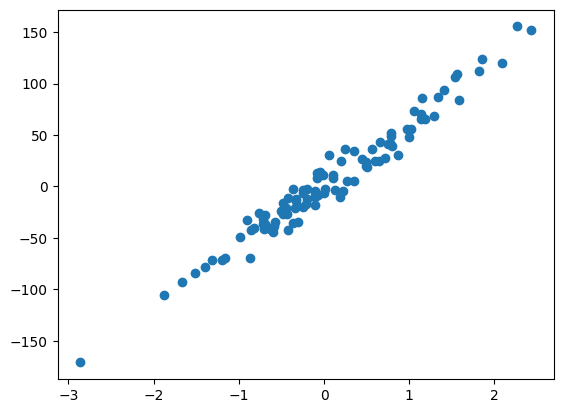

(100, 1)
(100,)


In [2]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

x,y = make_regression(n_samples=100, n_features=1, noise=10, random_state=5)
plt.scatter(x,y)
plt.show()
print(x.shape)
print(y.shape)

On voit que les dimensions de y sont incomplètes et donc on le redimensionne.

In [244]:
y = y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)


On construite la matrice X en concaténant horizontalement avec [hstack](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html).

In [264]:
X = np.hstack((x, np.ones(x.shape)))
print(X.shape)
print(np.around(X[0:3, :],3))

(100, 2)
[[ 1.523  1.   ]
 [-1.301  1.   ]
 [ 0.414  1.   ]]


On initialise le vecteur $\theta$ qu'on cherche avec des valeurs aléatoires.

In [246]:
rng = np.random.default_rng(3)
theta = rng.random((2,1))
print(np.around(theta, 3))
print(theta.shape)

[[0.086]
 [0.237]]
(2, 1)


Nous écrivons maintenant le fonction qui nous servira de modèle dont il faut trouver les paramètres $\theta$. On utilise pour cela le produit scalaire [dot](https://numpy.org/doc/1.21/reference/generated/numpy.ndarray.dot.html) (il existe aussi la forme [np.dot](https://numpy.org/doc/stable/reference/generated/numpy.dot.html)).

In [247]:
def model(X, theta):
    return X.dot(theta)

On peut afficher ce que donne le modèle avec les paramètres aléatoires et bien sûr, le résultat n'est pas probant pour le moment.

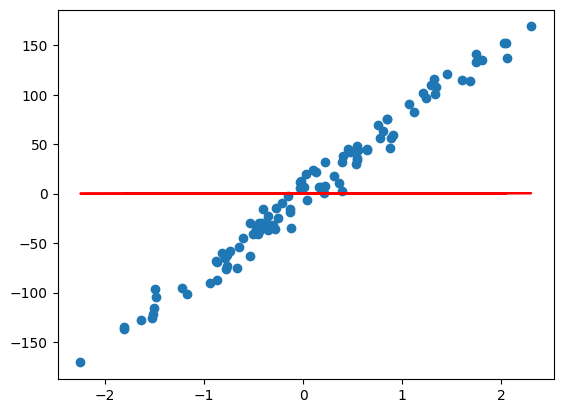

In [248]:
plt.scatter(x,y)
plt.plot(x, model(X,theta), c='r')
plt.show()


On calule la fonction coût.

In [249]:
def cost_function(X, y, theta):
    m = len(y)
    return 1 / (2*m) * np.sum(np.square(model(X,theta) -y))

In [250]:
print(np.around(cost_function(X,y,theta), 2))

2876.91


on passe maintenant à la descente du gradient dont on rappèle la formule.

$$\frac{\partial{J}(\theta)}{\partial{\theta}} = \frac{1}{m}X^T\cdot(X\cdot \theta - Y)$$

In [251]:
def grad(X,y,theta):
    m = len(y)
    return 1/m* X.T.dot(model(X, theta) -y)

In [252]:
grad(X,y,theta).shape

(2, 1)

On crée maintenant une fonction pour la descente du gradient.

In [253]:
def gradient_descent(X,y,theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X,y,theta)
        cost_history[i] = cost_function(X,y,theta)
    return theta, cost_history


In [254]:
theta_final, cost_history = gradient_descent(X,y,theta, learning_rate=0.01, n_iterations=1000)

On peut regarder le résultat de notre modèle.

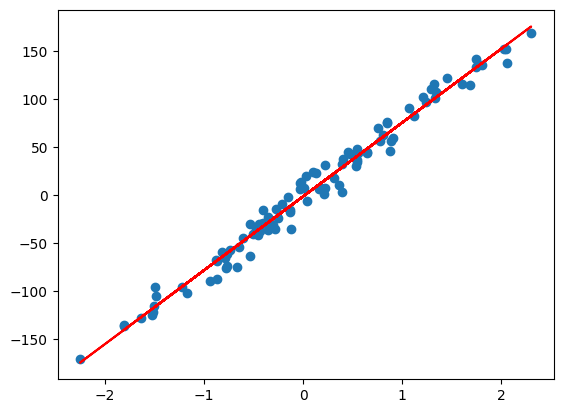

In [255]:
prediction = model(X, theta_final)

plt.scatter(x,y)
plt.plot(x, prediction, c='r')

# Courbe d'apprentissage

Grâce à ce que nous avons mis dans les fonctions, nous pouvons voir comment évolue l'apprentissage. 

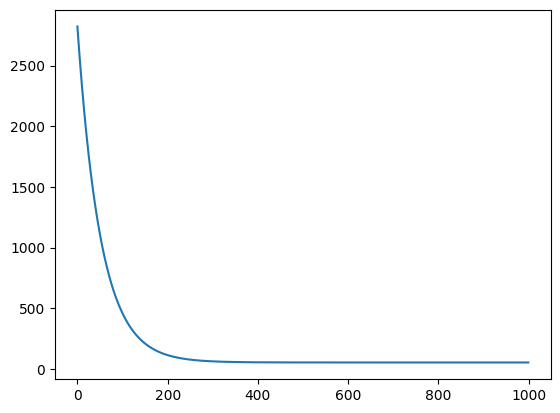

In [256]:
plt.plot(range(1000), cost_history)

# Coefficient de détermination

Le coefficient de détermination à la forme suivante.

$$R^2 = 1 - \frac{\sum \big(y-f(x)\big)^2}{\sum (y - \overline{x})^2}$$

Ceci se fait en introduisant les variables u et v

In [257]:
def coef_determination(y, pred):
    u = np.square(y-pred).sum()
    v = np.square(y - y.mean()).sum()
    return 1 - u / v


In [258]:
print(f'{coef_determination(y, prediction)*100:.2f}%')

98.14%


# Régression linéaire multiple

Les modèles linéaires peuvent servir à modéliser des problèmes non linéaires. Les solutions polynomiales font monter rapidement la complexité des résolutions.




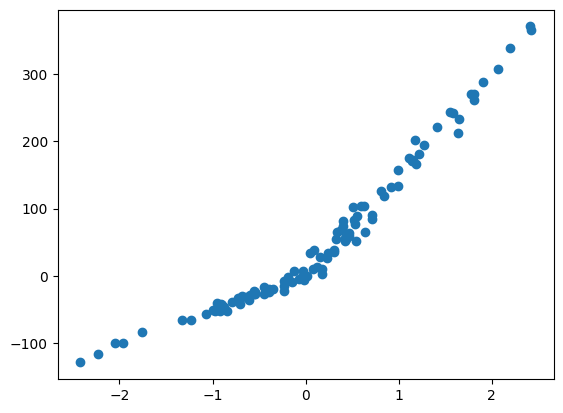

In [265]:
x1,y1 = make_regression(n_samples=100, n_features=1, noise=10)
y1 = y1 + abs(y1/2)
plt.scatter(x1,y1)
plt.show()

On voit qu'il faudrait une courbe pour faire une régression correcte. On va essayer ici un polynôme de degré 2. On rajoute donc une colonne de $x^2$ à notre matrice X.

In [267]:
X = np.hstack((x*x, x, np.ones(x.shape)))
# X = np.hstack((x*x, X))
X[:4,:]

array([[ 2.32005144,  1.52317151,  1.        ],
       [ 1.69198753, -1.30076421,  1.        ],
       [ 0.1714089 ,  0.41401558,  1.        ],
       [ 0.00570145, -0.07550792,  1.        ]])

In [270]:
print(X.shape)
print(np.around(X[:3],2))

(100, 3)
[[ 2.32  1.52  1.  ]
 [ 1.69 -1.3   1.  ]
 [ 0.17  0.41  1.  ]]


In [271]:
theta = rng.random((3,1))
theta

array([[0.80127447],
       [0.58216204],
       [0.09412864]])

In [292]:
theta = theta - 0.01 * grad(X,y,theta)
grad(X,y,theta).shape

(3, 100)

In [296]:
def grad(X,y,theta):
    m = len(y)
    return 1/m* X.T.dot(model(X, theta) -y)

def gradient_descent(X,y,theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X,y,theta)
        cost_history[i] = cost_function(X,y,theta)
    return theta, cost_history


In [297]:
theta_final, cost_history = gradient_descent(X,y,theta, learning_rate=0.01, n_iterations=10)
theta_final


array([[ 3.00709800e+01, -8.34921496e+00,  5.61854765e+00,
         1.58481072e-01,  1.39190500e+01,  1.69088943e+01,
        -9.47411632e+00,  3.75860702e+00,  4.23288570e+01,
        -9.46895415e-01,  1.23793895e+01, -1.19097034e+00,
        -3.32403022e+00,  2.91319720e+01,  5.60242724e+00,
         3.18987652e+00, -1.17006298e+01, -1.98045425e+00,
        -5.30822289e+00,  1.67689492e+00, -1.48111346e+01,
         1.78228211e+00,  3.67592659e+01,  2.17502896e+01,
         1.27796091e+01, -7.86947961e+00,  3.72106317e+01,
        -1.85208621e+00,  1.08959282e+00,  9.08969275e+00,
        -3.95629468e+00, -8.65656586e-01, -6.47247830e+00,
         2.38791304e+01, -4.16100581e+00,  3.41040668e+01,
         2.21356427e+01, -1.42324820e+01, -1.25563039e+01,
         2.33616975e+01, -9.60129253e+00, -1.75345231e+01,
        -7.52769374e-01,  2.80629939e+01,  2.97554587e+01,
         1.40413979e+01, -1.65358474e+01, -5.67858967e+00,
        -2.24838478e+00,  6.28668230e+00, -9.86747120e+0

In [ ]:
prediction = model(X, theta_final)
plt.scatter(x,y)
plt.plot(x, prediction, c='r')